<a href="https://colab.research.google.com/github/singhnidh/AgriGuard-A-Smart-Leaf-Disease-Detection-System-Leveraging-Attention-Mechanism-and-Ensemble-Learning/blob/main/Movie_Rating_Prediction_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Cleaning and Preprocessing:**

In [ ]:
import pandas as pd
# Read the CSV file with 'latin1' encoding
data = pd.read_csv('/content/drive/MyDrive/a fame technology/Datasets/Movie dataset.csv', encoding='latin1')

In [ ]:
data.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
imputer = SimpleImputer(strategy='mean')
data['Rating'] = imputer.fit_transform(data[['Rating']])

In [ ]:
# Extract numeric part from the 'Year' column using regular expressions
data['Year'] = data['Year'].str.extract(r'(\d+)').astype(float)
# Replace missing values in 'Year' with the most frequent year
most_frequent_year = data['Year'].mode()[0]
data['Year'].fillna(most_frequent_year, inplace=True)

data['Votes'] = data['Votes'].str.extract(r'(\d+)').astype(float)
most_frequent_vote = data['Votes'].mode()[0]
data['Votes'].fillna(most_frequent_vote, inplace=True)

data['Duration'] = data['Duration'].str.extract(r'(\d+)').astype(float)
most_frequent_Duration = data['Duration'].mode()[0]
data['Duration'].fillna(most_frequent_Duration, inplace=True)


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Impute missing values for numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [ ]:
# Display the preprocessed dataset
print("Preprocessed Dataset:\n")
data.head()

Preprocessed Dataset:



,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019.0,120.0,299,5.841621,1.0,1926,2250,800,3108
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,299,7.000000,8.0,1548,3280,4790,527
2,#Homecoming,2021.0,90.0,351,5.841621,1.0,5123,3713,2866,3450
3,#Yaaram,2019.0,110.0,228,4.400000,35.0,3319,2917,1504,4020
4,...And Once Again,2010.0,105.0,299,5.841621,1.0,385,3112,3462,405


In [ ]:
data.drop(columns=['Name'], inplace=True)
data.head(2)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019.0,120.0,299,5.841621,1.0,1926,2250,800,3108
1,2019.0,109.0,299,7.000000,8.0,1548,3280,4790,527


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Votes', y='Director', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Director']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Director')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Actor 3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Actor 3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

#**Exploratory Data Analysis (EDA): Data Vizualization**

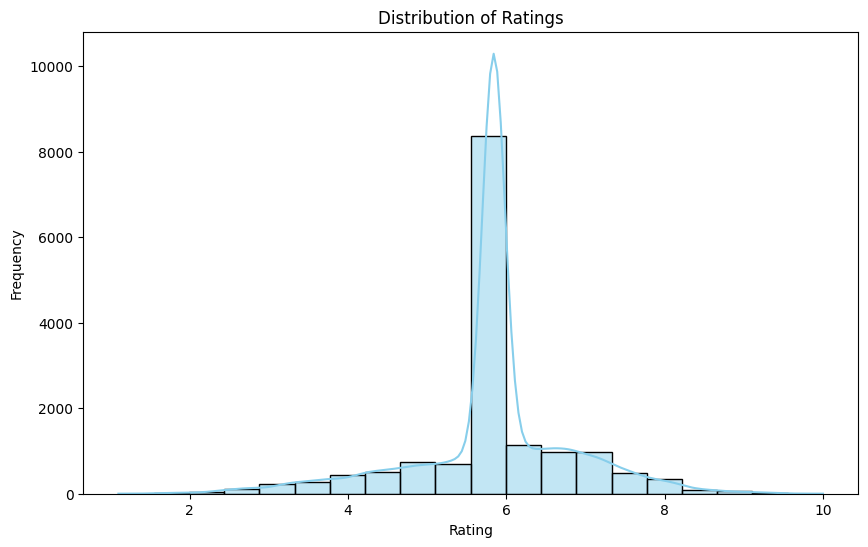

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of the target variable (Rating)
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

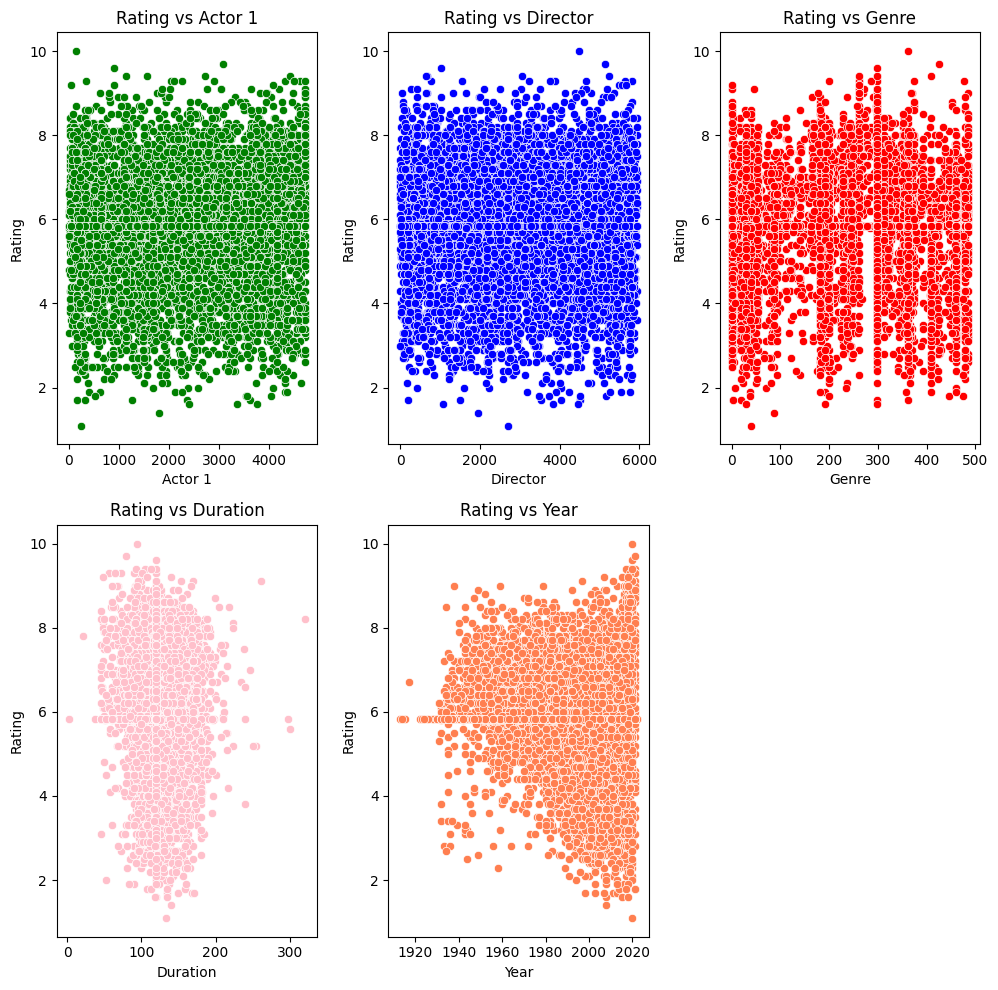

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x3 subplot layout
plt.figure(figsize=(10, 10))

# Plot Relationship between 'Actor 1' and 'Rating'
plt.subplot(2, 3, 1)
sns.scatterplot(x='Actor 1', y='Rating', data=data, color='green')
plt.title('Rating vs Actor 1')
plt.xlabel('Actor 1')
plt.ylabel('Rating')

# Plot Relationship between 'Director' and 'Rating'
plt.subplot(2, 3, 2)
sns.scatterplot(x='Director', y='Rating', data=data, color='blue')
plt.title('Rating vs Director')
plt.xlabel('Director')
plt.ylabel('Rating')

# Plot Relationship between 'Genre' and 'Rating'
plt.subplot(2, 3, 3)
sns.scatterplot(x='Genre', y='Rating', data=data, color='red')
plt.title('Rating vs Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')

# Plot Relationship between 'Duration' and 'Rating'
plt.subplot(2, 3, 4)
sns.scatterplot(x='Duration', y='Rating', data=data, color='pink')
plt.title('Rating vs Duration')
plt.xlabel('Duration')
plt.ylabel('Rating')

# Plot Relationship between 'Year' and 'Rating'
plt.subplot(2, 3, 5)
sns.scatterplot(x='Year', y='Rating', data=data, color='coral')
plt.title('Rating vs Year')
plt.xlabel('Year')
plt.ylabel('Rating')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


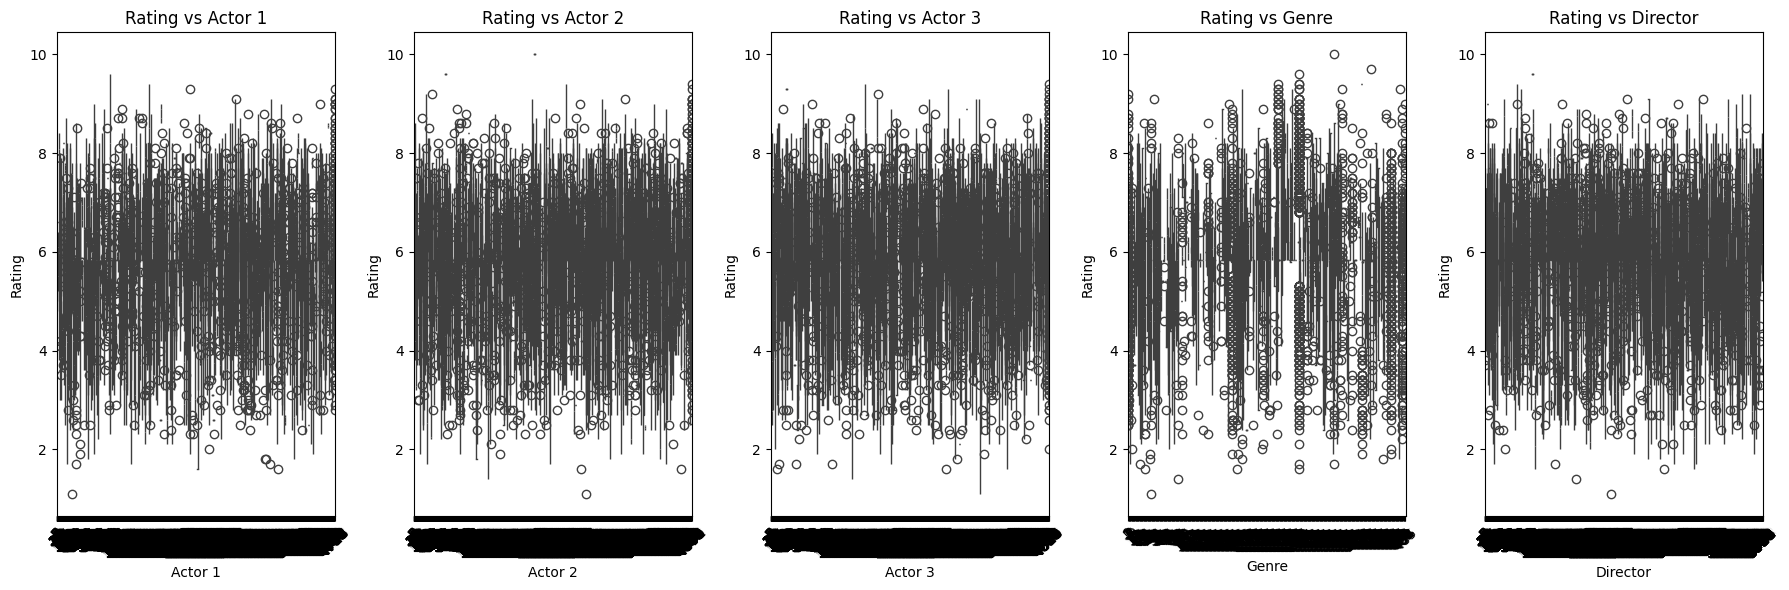

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 subplot layout
plt.figure(figsize=(18, 6))

# Plot boxplot for Actor 1
plt.subplot(1, 5, 1)
sns.boxplot(x='Actor 1', y='Rating', data=data)
plt.title('Rating vs Actor 1')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# Plot boxplot for Actor 2
plt.subplot(1, 5, 2)
sns.boxplot(x='Actor 2', y='Rating', data=data)
plt.title('Rating vs Actor 2')
plt.xlabel('Actor 2')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# Plot boxplot for Actor 3
plt.subplot(1, 5, 3)
sns.boxplot(x='Actor 3', y='Rating', data=data)
plt.title('Rating vs Actor 3')
plt.xlabel('Actor 3')
plt.ylabel('Rating')
plt.xticks(rotation=45)

plt.subplot(1, 5, 4)
sns.boxplot(x='Genre', y='Rating', data=data)
plt.title('Rating vs Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)

plt.subplot(1, 5, 5)
sns.boxplot(x='Director', y='Rating', data=data)
plt.title('Rating vs Director')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


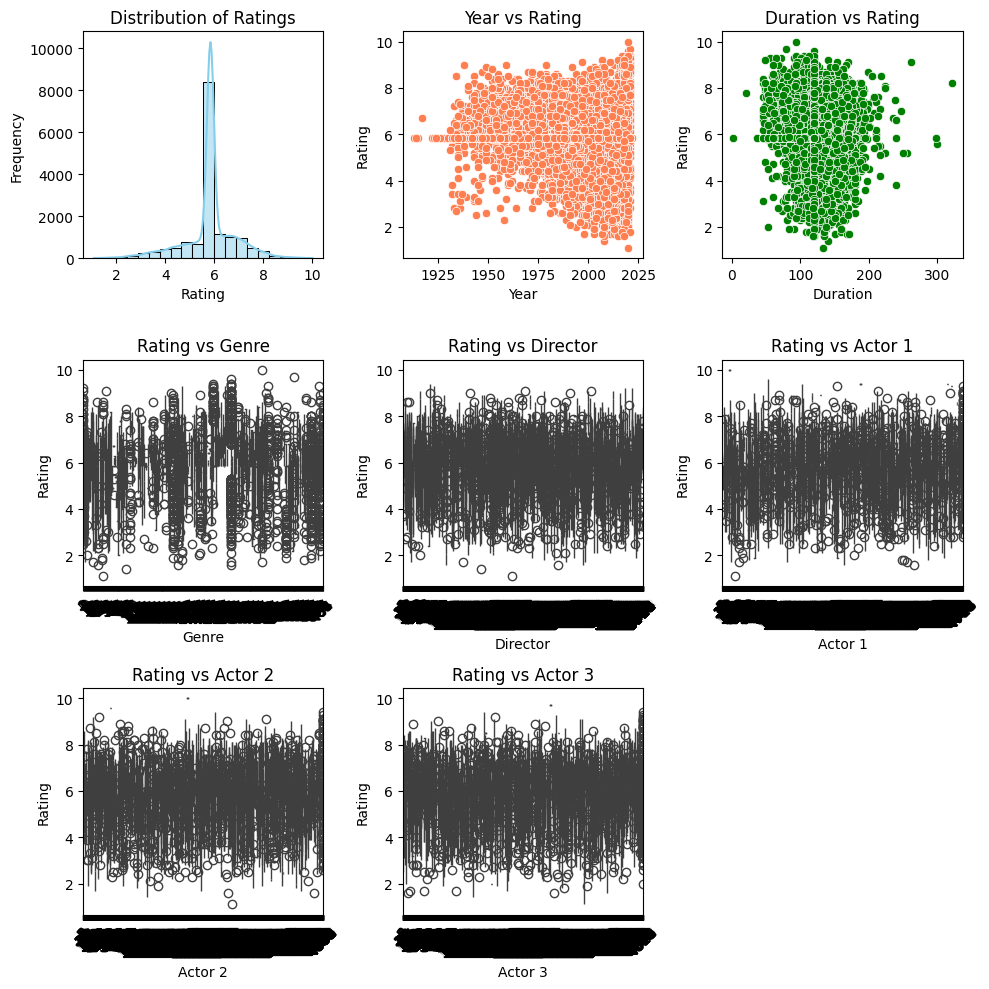

In [ ]:
# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Analyze the distribution of the target variable (Rating)
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Ratings')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')

# Relationship between 'Year' and 'Rating'
sns.scatterplot(x='Year', y='Rating', data=data, color='coral', ax=axes[0, 1])
axes[0, 1].set_title('Year vs Rating')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Rating')

# Relationship between 'Duration' and 'Rating'
sns.scatterplot(x='Duration', y='Rating', data=data, color='green', ax=axes[0, 2])
axes[0, 2].set_title('Duration vs Rating')
axes[0, 2].set_xlabel('Duration')
axes[0, 2].set_ylabel('Rating')

# Visualize important features (e.g., Genre, Director, Actors)
# Boxplot of Rating vs Genre
sns.boxplot(x='Genre', y='Rating', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Rating vs Genre')
axes[1, 0].set_xlabel('Genre')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].tick_params(axis='x', rotation=45)

# Boxplot of Rating vs Director
sns.boxplot(x='Director', y='Rating', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Rating vs Director')
axes[1, 1].set_xlabel('Director')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].tick_params(axis='x', rotation=45)

# Boxplot of Rating vs Actors (Actor1, Actor2, Actor3)
sns.boxplot(x='Actor 1', y='Rating', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Rating vs Actor 1')
axes[1, 2].set_xlabel('Actor 1')
axes[1, 2].set_ylabel('Rating')
axes[1, 2].tick_params(axis='x', rotation=45)

sns.boxplot(x='Actor 2', y='Rating', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Rating vs Actor 2')
axes[2, 0].set_xlabel('Actor 2')
axes[2, 0].set_ylabel('Rating')
axes[2, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Actor 3', y='Rating', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Rating vs Actor 3')
axes[2, 1].set_xlabel('Actor 3')
axes[2, 1].set_ylabel('Rating')
axes[2, 1].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[2, 2])

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


#**Split dataset into features and target variable**

In [ ]:
# Split dataset into features and target variable
X = data[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Building and Model Evaluation**
**1. Model : Rnadom forest model 1**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
# Predict on the testing set
y_pred = model_RF.predict(X_test)

# Evaluate the model
mse_RF = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for RandomForestRegressor:", mse_RF)


Mean Squared Error for RandomForestRegressor: 0.6997268266846233


#**Use the trained model to predict ratings for new movies**

In [ ]:
# Prediction
new_movie = [[2009, 109, 'Drama', 8, 'Gaurav Bakshi', 'Rasika Dugal', 'Vivek Ghamande', 'Arvind Jangid']]
#new_movie[0][0] = label_encoder.fit_transform([new_movie[0][0]])[0]
new_movie[0][2] = label_encoder.fit_transform([new_movie[0][2]])[0]

new_movie[0][4:8] = label_encoder.fit_transform(new_movie[0][4:8])

# Predict rating for the new movie
predicted_rating = model_RF.predict(new_movie)
print(f"Predicted Rating for the new movie: {predicted_rating[0]}")


Predicted Rating for the new movie: 6.589999999999999


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#**Model 2 : LinearRegression**

In [ ]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

# Model Building
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Model Evaluation
predictions = model_LR.predict(X_test)
mse_LR = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for LinearRegression : {mse_LR}")

# Prediction
predicted_rating = model_LR.predict(new_movie)
print(f"Predicted Rating for the new movie: {predicted_rating[0]}")


Mean Squared Error for LinearRegression : 0.9479741395294867
Predicted Rating for the new movie: 5.607898920693961


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#**Model 3 : Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)

# Make predictions on the test data
predictions = model_DT.predict(X_test)

# Evaluate the model
mse_DT = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for DecisionTreeRegressor: {mse_DT}")

# Prediction
predicted_rating = model_DT.predict(new_movie)
print(f"Predicted Rating for the new movie: {predicted_rating[0]}")



Mean Squared Error for DecisionTreeRegressor: 1.284726540616848
Predicted Rating for the new movie: 8.7


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


#**MODEL 4 : SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assume X_train and y_train are your training data

# Create a Support Vector Regression model
model_SVR = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for SVR

# Fit the model to the training data
model_SVR.fit(X_train, y_train)

# Make predictions on the test data
predictions = model_SVR.predict(X_test)

# Evaluate the model
mse_SVR = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for SVR: {mse_SVR}")
# Prediction
predicted_rating = model_SVR.predict(new_movie)
print(f"Predicted Rating for the new movie: {predicted_rating[0]}")


Mean Squared Error for SVR: 0.959533594073128
Predicted Rating for the new movie: 5.800407688214279


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
